In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style("whitegrid")

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [2]:
df = pd.read_csv('gestures_data_3D+Haar.csv',index_col=0)
df.head()

,label,user,filename,time_range,x_mean,x_max,x_min,x_range,x_upturns,x_downturns,x_upcross,x_downcross,y_mean,y_max,y_min,y_range,y_upturns,y_downturns,y_upcross,y_downcross,z_mean,z_max,z_min,z_range,z_upturns,z_downturns,z_upcross,z_downcross,Mjerk_mean,Mjerk_max,Mjerk_min,Mjerk_range,Mjerk_upturns,Mjerk_downturns,Mjerk_upcross,Mjerk_downcross,Macc_mean,Macc_max,Macc_min,Macc_range,Macc_upturns,Macc_downturns,Macc_upcross,Macc_downcross,Mvel_mean,Mvel_max,Mvel_min,Mvel_range,Mvel_upturns,Mvel_downturns,Mvel_upcross,Mvel_downcross,Mdist_mean,Mdist_max,Mdist_min,Mdist_range,Mdist_upturns,Mdist_downturns,Mdist_upcross,Mdist_downcross,jerk0_mean,jerk0_max,jerk0_min,jerk0_range,jerk0_upturns,jerk0_downturns,jerk0_upcross,jerk0_downcross,jerk1_mean,jerk1_max,jerk1_min,jerk1_range,jerk1_upturns,jerk1_downturns,jerk1_upcross,jerk1_downcross,jerk2_mean,jerk2_max,jerk2_min,jerk2_range,jerk2_upturns,jerk2_downturns,jerk2_upcross,jerk2_downcross,acc_g0_mean,acc_g0_max,acc_g0_min,acc_g0_range,acc_g0_upturns,acc_g0_downturns,acc_g0_upcross,acc_g0_downcross,acc_g1_mean,acc_g1_max,acc_g1_min,acc_g1_range,acc_g1_upturns,acc_g1_downturns,acc_g1_upcross,acc_g1_downcross,acc_g2_mean,acc_g2_max,acc_g2_min,acc_g2_range,acc_g2_upturns,acc_g2_downturns,acc_g2_upcross,acc_g2_downcross,vel_g0_mean,vel_g0_max,vel_g0_min,vel_g0_range,vel_g0_upturns,vel_g0_downturns,vel_g0_upcross,vel_g0_downcross,vel_g1_mean,vel_g1_max,vel_g1_min,vel_g1_range,vel_g1_upturns,vel_g1_downturns,vel_g1_upcross,vel_g1_downcross,vel_g2_mean,vel_g2_max,vel_g2_min,vel_g2_range,vel_g2_upturns,vel_g2_downturns,vel_g2_upcross,vel_g2_downcross,pos_g0_mean,pos_g0_max,pos_g0_min,pos_g0_range,pos_g0_upturns,pos_g0_downturns,pos_g0_upcross,pos_g0_downcross,pos_g1_mean,pos_g1_max,pos_g1_min,pos_g1_range,pos_g1_upturns,pos_g1_downturns,pos_g1_upcross,pos_g1_downcross,pos_g2_mean,pos_g2_max,pos_g2_min,pos_g2_range,pos_g2_upturns,pos_g2_downturns,pos_g2_upcross,pos_g2_downcross,dim0-coef0,dim0-coef1,dim0-coef2,dim0-coef3,dim0-coef4,dim0-coef5,dim0-coef6,dim0-coef7,dim0-coef8,dim0-coef9,dim1-coef0,dim1-coef1,dim1-coef2,dim1-coef3,dim1-coef4,dim1-coef5,dim1-coef6,dim1-coef7,dim1-coef8,dim1-coef9,dim2-coef0,dim2-coef1,dim2-coef2,dim2-coef3,dim2-coef4,dim2-coef5,dim2-coef6,dim2-coef7,dim2-coef8,dim2-coef9
0,1,U01,gestures-dataset/U01/01/01.txt,14.210,1.490,4.377,-0.291,4.668,1,2,1,2,-1.396,0.762,-4.472,5.234,1,2,1,1,9.849,10.383,9.237,1.146,1,2,0,0,-0.147,0.549,-0.890,1.439,1,2,2,2,0.836,2.143,0.094,2.049,1,2,0,0,7.779,11.353,0.358,10.995,0,0,0,0,40.369,94.484,0.743,93.741,0,0,0,0,-0.210,1.141,-1.569,2.710,1,2,2,2,-0.123,1.502,-2.093,3.595,2,2,2,2,-0.133,0.288,-0.922,1.211,1,2,1,1,-0.043,2.845,-1.823,4.668,1,2,0,1,-0.477,1.681,-3.553,5.234,1,2,1,2,-0.264,0.270,-0.877,1.146,1,2,0,1,4.272,9.039,-0.463,9.502,0,1,1,1,-2.603,3.747,-6.890,10.638,1,2,0,1,-1.510,0.573,-3.209,3.782,0,1,1,1,30.440,54.619,-0.362,54.982,0,0,1,0,-3.756,10.447,-30.563,41.009,0,1,0,1,-4.793,1.378,-17.957,19.335,0,1,0,1,2.688,5.427,5.395,1.487,-0.154,-0.521,-0.698,0.795,0.860,0.024,-0.583,0.806,-3.537,-5.756,-2.244,-0.711,0.271,1.533,-0.568,-0.813,14.451,14.525,13.476,13.178,13.824,-0.148,0.158,0.269,-0.115,-0.152
1,1,U01,gestures-dataset/U01/01/02.txt,14.242,1.057,3.992,-3.051,7.043,1,2,0,1,-1.381,1.081,-4.462,5.543,1,1,2,1,9.941,10.344,9.455,0.889,1,2,0,0,0.011,0.537,-0.601,1.138,1,2,1,2,0.842,1.925,0.057,1.869,1,2,0,0,7.112,11.663,0.232,11.431,0,0,0,0,34.435,86.033,0.529,85.504,0,0,0,0,-0.406,1.028,-3.061,4.089,1,2,1,2,0.122,2.133,-2.041,4.175,2,2,2,1,-0.034,0.333,-0.766,1.099,1,1,1,2,0.291,3.226,-3.817,7.043,1,2,0,1,-0.768,1.694,-3.849,5.543,1,1,1,1,0.135,0.537,-0.351,0.889,1,2,1,2,8.273,12.548,0.226,12.321,0,1,0,0,-5.198,3.017,-12.599,15.616,1,1,1,1,1.439,2.453,0.154,2.299,1,1,0,0,48.704,103.474,0.590,102.884,0,0,0,0,-13.233,7.970,-62.085,70.055,0,1,0,1,8.294,17.451,0.352,17.100,0,0,0,0,1.785,4.733,5.094,1.857,0.125,-0.700,-0.663,0.551,0.830,0.045,-0.312,0.842,-2.847,-6.249,-4.028,-0.550,0.166,1.488,-0.061,-0.728,14.056,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 0 to 3250
Columns: 186 entries, label to dim2-coef9
dtypes: float64(107), int64(77), object(2)
memory usage: 4.6+ MB


In [4]:
#limit to looking only at certain gestures
#df = df[df['label']<=12]
#df = df[df['label']>=9]
df.sample(6)

,label,user,filename,time_range,x_mean,x_max,x_min,x_range,x_upturns,x_downturns,x_upcross,x_downcross,y_mean,y_max,y_min,y_range,y_upturns,y_downturns,y_upcross,y_downcross,z_mean,z_max,z_min,z_range,z_upturns,z_downturns,z_upcross,z_downcross,Mjerk_mean,Mjerk_max,Mjerk_min,Mjerk_range,Mjerk_upturns,Mjerk_downturns,Mjerk_upcross,Mjerk_downcross,Macc_mean,Macc_max,Macc_min,Macc_range,Macc_upturns,Macc_downturns,Macc_upcross,Macc_downcross,Mvel_mean,Mvel_max,Mvel_min,Mvel_range,Mvel_upturns,Mvel_downturns,Mvel_upcross,Mvel_downcross,Mdist_mean,Mdist_max,Mdist_min,Mdist_range,Mdist_upturns,Mdist_downturns,Mdist_upcross,Mdist_downcross,jerk0_mean,jerk0_max,jerk0_min,jerk0_range,jerk0_upturns,jerk0_downturns,jerk0_upcross,jerk0_downcross,jerk1_mean,jerk1_max,jerk1_min,jerk1_range,jerk1_upturns,jerk1_downturns,jerk1_upcross,jerk1_downcross,jerk2_mean,jerk2_max,jerk2_min,jerk2_range,jerk2_upturns,jerk2_downturns,jerk2_upcross,jerk2_downcross,acc_g0_mean,acc_g0_max,acc_g0_min,acc_g0_range,acc_g0_upturns,acc_g0_downturns,acc_g0_upcross,acc_g0_downcross,acc_g1_mean,acc_g1_max,acc_g1_min,acc_g1_range,acc_g1_upturns,acc_g1_downturns,acc_g1_upcross,acc_g1_downcross,acc_g2_mean,acc_g2_max,acc_g2_min,acc_g2_range,acc_g2_upturns,acc_g2_downturns,acc_g2_upcross,acc_g2_downcross,vel_g0_mean,vel_g0_max,vel_g0_min,vel_g0_range,vel_g0_upturns,vel_g0_downturns,vel_g0_upcross,vel_g0_downcross,vel_g1_mean,vel_g1_max,vel_g1_min,vel_g1_range,vel_g1_upturns,vel_g1_downturns,vel_g1_upcross,vel_g1_downcross,vel_g2_mean,vel_g2_max,vel_g2_min,vel_g2_range,vel_g2_upturns,vel_g2_downturns,vel_g2_upcross,vel_g2_downcross,pos_g0_mean,pos_g0_max,pos_g0_min,pos_g0_range,pos_g0_upturns,pos_g0_downturns,pos_g0_upcross,pos_g0_downcross,pos_g1_mean,pos_g1_max,pos_g1_min,pos_g1_range,pos_g1_upturns,pos_g1_downturns,pos_g1_upcross,pos_g1_downcross,pos_g2_mean,pos_g2_max,pos_g2_min,pos_g2_range,pos_g2_upturns,pos_g2_downturns,pos_g2_upcross,pos_g2_downcross,dim0-coef0,dim0-coef1,dim0-coef2,dim0-coef3,dim0-coef4,dim0-coef5,dim0-coef6,dim0-coef7,dim0-coef8,dim0-coef9,dim1-coef0,dim1-coef1,dim1-coef2,dim1-coef3,dim1-coef4,dim1-coef5,dim1-coef6,dim1-coef7,dim1-coef8,dim1-coef9,dim2-coef0,dim2-coef1,dim2-coef2,dim2-coef3,dim2-coef4,dim2-coef5,dim2-coef6,dim2-coef7,dim2-coef8,dim2-coef9
1778,7,U05,gestures-dataset/U05/07/11.txt,28.531,5.453,10.503,-1.095,11.598,3,3,1,1,0.717,8.144,-2.201,10.346,4,4,2,2,8.379,14.179,2.057,12.121,3,4,0,0,0.038,4.123,-3.536,7.659,3,4,4,4,2.066,7.156,-3.660,10.816,3,4,2,2,26.868,54.502,0.261,54.241,2,2,0,0,260.228,668.975,0.685,668.290,0,0,0,0,-0.079,3.366,-3.536,6.902,3,3,3,3,-0.059,3.393,-3.375,6.768,4,4,3,4,0.060,3.024,-4.470,7.494,3,4,4,4,-0.676,4.374,-7.224,11.598,3,3,1,2,2.249,9.677e+00,-0.669,10.346,4,4,1,2,0.564,6.364,-5.757,12.121,3,4,3,3,-16.052,9.328,-4.020e+01,49.526,1,2,1,1,38.762,62.422,0.138,62.283,1,2,0,0,5.808,17.063,-1.725,18.788,3,3,1,1,-144.620,32.695,-409.187,441.882,0,1,0,1,352.840,976.613,0.544,976.069,0,0,0,0,79.452,142.222,0.248,141.973,1,1,0,0,9.361,12.678,11.398,2.636,-1.244,-0.686,-0.795,1.676,2.066,0.031,-1.704,-0.656,-0.680,4.961,11.413,-0.435,-0.008,-0.308,-2.397,-0.105,12.726,19.012,14.523,3.903,7.801,-1.634,-1.040,3.239,0.993,-2.148
1154,16,U03,gestures-dataset/U03/16/15.txt,16.333,7.213,9.387,2.222,7.164,1,2,0,0,-2.562,-0.612,-4.138,3.525,2,2,0,0,7.677,12.904,0.333,12.570,2,2,0,0,-0.139,3.825,-3.997,7.822,2,2,1,2,2.366,6.714,-2.737,9.451,1,2,1,1,20.159,36.057,0.318,35.739,1,1,0,0,114.195,281.871,0.826,281.045,0,0,0,0,-0.013,3.096,-2.822,5.918,2,2,1,2,-0.202,0.401,-0.643,1.043,3,2,2,2,-0.286,5.059,-5.126,10.186,2,2,1,2,-0.295,1.878,-5.286,7.164,1,2,1,2,-1.949,4.382e-04,-3.525,3.525,2,2,0,1,1.395,6.621,-5.949,12.570,2,2,1,1,-3.530,4.057,-1.060e+01,14.661,1,1,0,1,-13.294,-0.236,-29.329,29.094,0,0,0,0,12.567,20.963,0.335,20.628,1,2,0,0,-13.746,10.647,-51.020,61.666,0,1,1,1,-68.260,-0.804,-183.912,183.108,0,0,0,0,80.230,175.788,0.929,174.859,0,0,0,0,11.136,12.995,9.727,3.431,8.715,-0.465,-0.280,2.006,0.288,-2.193,-1.

In [1]:
from sklearn.model_selection import train_test_split


In [6]:
X = df.drop(['label','user','filename'],axis=1)
y = df['label']

X = (X - X.mean()) / X.std()   #giving X standard scaling to allow coefficient comparision
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X.head()

,time_range,x_mean,x_max,x_min,x_range,x_upturns,x_downturns,x_upcross,x_downcross,y_mean,y_max,y_min,y_range,y_upturns,y_downturns,y_upcross,y_downcross,z_mean,z_max,z_min,z_range,z_upturns,z_downturns,z_upcross,z_downcross,Mjerk_mean,Mjerk_max,Mjerk_min,Mjerk_range,Mjerk_upturns,Mjerk_downturns,Mjerk_upcross,Mjerk_downcross,Macc_mean,Macc_max,Macc_min,Macc_range,Macc_upturns,Macc_downturns,Macc_upcross,Macc_downcross,Mvel_mean,Mvel_max,Mvel_min,Mvel_range,Mvel_upturns,Mvel_downturns,Mvel_upcross,Mvel_downcross,Mdist_mean,Mdist_max,Mdist_min,Mdist_range,Mdist_upturns,Mdist_downturns,Mdist_upcross,Mdist_downcross,jerk0_mean,jerk0_max,jerk0_min,jerk0_range,jerk0_upturns,jerk0_downturns,jerk0_upcross,jerk0_downcross,jerk1_mean,jerk1_max,jerk1_min,jerk1_range,jerk1_upturns,jerk1_downturns,jerk1_upcross,jerk1_downcross,jerk2_mean,jerk2_max,jerk2_min,jerk2_range,jerk2_upturns,jerk2_downturns,jerk2_upcross,jerk2_downcross,acc_g0_mean,acc_g0_max,acc_g0_min,acc_g0_range,acc_g0_upturns,acc_g0_downturns,acc_g0_upcross,acc_g0_downcross,acc_g1_mean,acc_g1_max,acc_g1_min,acc_g1_range,acc_g1_upturns,acc_g1_downturns,acc_g1_upcross,acc_g1_downcross,acc_g2_mean,acc_g2_max,acc_g2_min,acc_g2_range,acc_g2_upturns,acc_g2_downturns,acc_g2_upcross,acc_g2_downcross,vel_g0_mean,vel_g0_max,vel_g0_min,vel_g0_range,vel_g0_upturns,vel_g0_downturns,vel_g0_upcross,vel_g0_downcross,vel_g1_mean,vel_g1_max,vel_g1_min,vel_g1_range,vel_g1_upturns,vel_g1_downturns,vel_g1_upcross,vel_g1_downcross,vel_g2_mean,vel_g2_max,vel_g2_min,vel_g2_range,vel_g2_upturns,vel_g2_downturns,vel_g2_upcross,vel_g2_downcross,pos_g0_mean,pos_g0_max,pos_g0_min,pos_g0_range,pos_g0_upturns,pos_g0_downturns,pos_g0_upcross,pos_g0_downcross,pos_g1_mean,pos_g1_max,pos_g1_min,pos_g1_range,pos_g1_upturns,pos_g1_downturns,pos_g1_upcross,pos_g1_downcross,pos_g2_mean,pos_g2_max,pos_g2_min,pos_g2_range,pos_g2_upturns,pos_g2_downturns,pos_g2_upcross,pos_g2_downcross,dim0-coef0,dim0-coef1,dim0-coef2,dim0-coef3,dim0-coef4,dim0-coef5,dim0-coef6,dim0-coef7,dim0-coef8,dim0-coef9,dim1-coef0,dim1-coef1,dim1-coef2,dim1-coef3,dim1-coef4,dim1-coef5,dim1-coef6,dim1-coef7,dim1-coef8,dim1-coef9,dim2-coef0,dim2-coef1,dim2-coef2,dim2-coef3,dim2-coef4,dim2-coef5,dim2-coef6,dim2-coef7,dim2-coef8,dim2-coef9
0,-1.232,-0.682,-1.249,0.591,-1.358,-0.843,0.162,0.739,2.390,-0.008,-0.832,0.419,-0.875,-1.373,-0.041,0.016,0.045,1.114,-0.797,1.590,-1.695,-1.480,-0.288,-0.373,-0.375,-0.420,-1.501,0.864,-1.252,-1.503,-0.622,-0.221,-0.449,-0.753,-1.364,1.314,-1.640,-1.259,-0.331,-1.722,-1.748,-0.866,-1.049,0.451,-1.136,-1.598,-1.514,-0.675,-0.473,-0.881,-0.945,0.344,-0.969,-0.601,-0.295,-0.506,-0.273,-0.379,-0.933,0.694,-0.959,-1.189,-0.328,0.221,0.125,-0.505,-0.754,0.259,-0.571,-0.492,-0.231,-0.192,-0.226,-0.276,-0.940,1.084,-1.129,-1.594,-0.545,-1.447,-1.603,-0.258,-0.763,0.555,-1.358,-0.843,0.162,-1.416,-0.005,-0.023,-0.735,0.343,-0.875,-1.373,-0.041,-0.200,1.203,-0.252,-1.512,1.045,-1.695,-1.480,-0.288,-1.692,-0.466,-0.255,-0.689,0.600,-1.184,-0.953,0.213,0.797,0.837,0.128,-0.538,0.614,-1.056,0.088,1.559,-0.944,0.523,-0.257,-0.826,0.479,-1.188,-1.494,-0.267,0.561,0.706,-0.254,-0.627,0.483,-0.935,-0.647,-0.841,1.146,-0.854,0.217,-0.462,0.569,-0.874,-0.771,1.0,-0.652,1.017,-0.258,-0.677,0.388,-0.919,-0.719,0.975,-0.660,1.482,-0.111,-0.043,-0.281,-0.633,-0.680,-0.168,-0.013,0.438,0.243,0.022,0.216,0.679,-0.042,-0.707,-0.060,-0.977,-0.121,1.164,-0.196,-0.590,0.909,0.334,0.514,0.678,0.709,0.322,0.226,-0.275,-0.134,0.213
1,-1.226,-0.835,-1.344,-0.193,-0.907,-0.843,0.162,-0.969,0.691,0.001,-0.713,0.423,-0.797,-1.373,-1.217,1.392,0.045,1.166,-0.815,1.652,-1.755,-1.480,-0.288,-0.373,-0.375,0.295,-1.508,0.976,-1.331,-1.503,-0.622,-1.407,-0.449,-0.747,-1.431,1.291,-1.684,-1.259,-0.331,-1.722,-1.748,-0.919,-1.034,0.412,-1.114,-1.598,-1.514,-0.675,-0.473,-0.937,-0.976,0.324,-1.000,-0.601,-0.295,-0.506,-0.273,-0.788,-1.004,-0.225,-0.454,-1.189,-0.328,-0.919,0.125,0.333,-0.324,0.290,-0.356,-0.492,-0.231,-0.192,-1.373,0.095,-0.924,1.163,-1

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import learning_curve

In [8]:
def accuracy(predict,y_test):
    total = 0
    for guess,ans in zip(predict,y_test):
        if guess == ans: total +=1
    return total/len(y_test)

In [9]:
acc_list = []
for i in range(1,25):
    KNN = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    KNN.fit(X_train,y_train)
    predict = KNN.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)

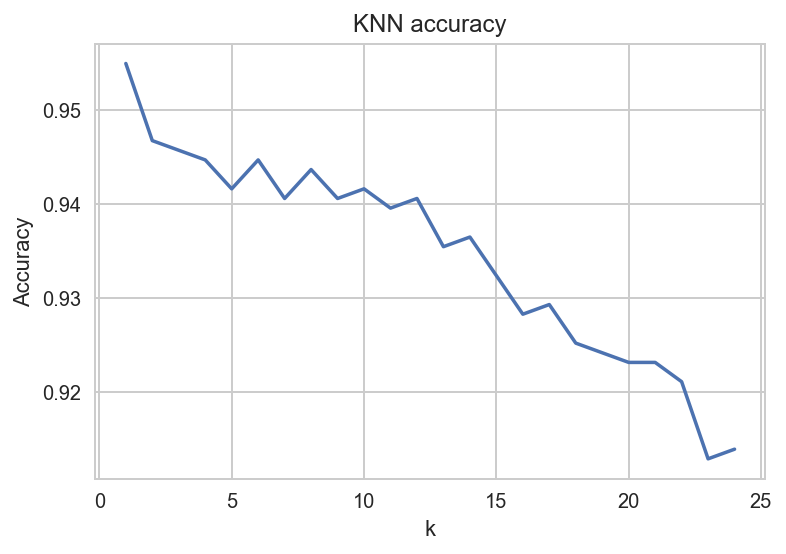

In [10]:
plt.plot(range(1,25),acc_list)
plt.title('KNN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('k');

In [11]:
acc_list = []
for i in range(5):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    LRmodel = LogisticRegression(n_jobs=-1)
    LRmodel.fit(X_train,y_train)
    predict = LRmodel.predict(X_test)
    acc = accuracy(predict,y_test)
    acc_list.append(acc)
np.mean(acc_list), np.std(acc_list), LRmodel.coef_

(0.96598360655737703,
 0.0041694651535606033,
 array([[ 0.78904784, -0.61569301, -0.02643074, ..., -0.17364656,
         -0.04172407,  0.20227185],
        [-0.29826434, -0.45445365,  0.02434568, ..., -0.00450021,
          0.12517274, -0.14653649],
        [-1.57862556,  0.03394322,  0.01243231, ..., -0.03984653,
          0.21164485,  0.18612389],
        ..., 
        [ 0.47554904,  1.01056908,  0.20124143, ..., -0.05119237,
         -0.16536298,  0.46685583],
        [-0.12718106, -0.16213004, -0.09343678, ..., -0.16389091,
          0.14051248, -0.09224557],
        [-0.31535939, -0.08644258,  0.1502539 , ..., -0.37458463,
          0.06508045, -0.07668525]]))

In [12]:
len(LRmodel.coef_)

20

In [13]:
guesture_number = 1 - 1
report = list(zip(X.columns,LRmodel.coef_[guesture_number]))  # importances FOR gesture 1 only

In [14]:
order_indexes = np.argsort(np.abs(LRmodel.coef_[guesture_number]))
sorted_report = []
for i in order_indexes[::-1]:
    sorted_report.append(report[i])
sorted_report

[('dim0-coef5', -0.81358427955636015),
 ('time_range', 0.78904783686318158),
 ('dim1-coef5', -0.65751529651642671),
 ('pos_g1_upturns', -0.63809649177647243),
 ('x_mean', -0.6156930100486635),
 ('Mjerk_upturns', -0.54830093811628622),
 ('z_max', -0.53347524697618109),
 ('jerk1_max', -0.52527615216520018),
 ('vel_g0_range', -0.47455817462050848),
 ('vel_g0_max', -0.4601836976507469),
 ('pos_g1_downturns', 0.44979356090457973),
 ('dim0-coef8', 0.42532854348561344),
 ('dim1-coef1', 0.41697053235532772),
 ('dim1-coef4', -0.41608827279516558),
 ('x_upcross', -0.40073218517567782),
 ('Macc_min', 0.39782306632231756),
 ('jerk0_mean', -0.38085636226230091),
 ('acc_g2_max', -0.37710573798651925),
 ('Macc_range', -0.37528761388689919),
 ('dim1-coef9', 0.37417429539189817),
 ('dim0-coef6', -0.3617921016592392),
 ('jerk1_upturns', -0.3460568253821053),
 ('x_downcross', 0.33825076050298586),
 ('jerk1_min', -0.33622494525700741),
 ('pos_g0_min', -0.32934536443510026),
 ('dim1-coef8', 0.3252992796864

In [15]:
# combined coefficent total to find the most important variables, and any irrelevant ones
coef_total = 0
for gesture in range(len(df.label.unique())):
    coef_total += np.abs(LRmodel.coef_[gesture])
    
report = list(zip(X.columns,coef_total))  # importances FOR gesture 1 only

order_indexes = np.argsort(np.abs(coef_total))
              
sorted_report = []
for i in order_indexes[::-1]:
    sorted_report.append(report[i])

sorted_report

[('jerk0_mean', 10.046365492164538),
 ('Mjerk_max', 8.5550891910647433),
 ('y_mean', 8.5285375663579259),
 ('dim1-coef5', 8.2568896443599709),
 ('jerk1_mean', 8.0602849815945028),
 ('Macc_min', 8.0198426551770581),
 ('jerk1_min', 7.9544969230560785),
 ('dim0-coef5', 7.8562627507692033),
 ('jerk0_max', 7.8030611995166241),
 ('Mvel_range', 7.5752214828784048),
 ('Mvel_max', 7.5012844456150161),
 ('vel_g0_range', 7.4918419056037822),
 ('time_range', 7.2900157214302563),
 ('jerk0_min', 7.1492210791228841),
 ('jerk1_max', 7.0757596307541188),
 ('x_mean', 6.8827250544505691),
 ('dim1-coef9', 6.8093521771045626),
 ('x_min', 6.736279594807832),
 ('dim1-coef4', 6.7262770634474975),
 ('acc_g1_upcross', 6.7254231057723084),
 ('Macc_max', 6.5230751694455833),
 ('dim1-coef3', 6.5046959863678211),
 ('y_min', 6.4345982719315442),
 ('jerk2_min', 6.0165882838792886),
 ('dim0-coef6', 5.9689220702710779),
 ('x_downcross', 5.9114868365476578),
 ('dim1-coef7', 5.7885315950120253),
 ('Mdist_min', 5.75387155

## Take aways:
### Last used features:
- anything on axis 2
- downturns - but a few are in the top 20!
- downcross

In [16]:
#Use the coefficients to deterimine good and poor features

### Logistic Regression did pretty well
## will now try a battery of models, using their default parameters:

In [17]:
def ModelIt(LearningAlgorithm,X,y,N_times = 12,multi=False):
    acc_list = []
    for i in range(N_times):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
        if multi == True: model = LearningAlgorithm(n_jobs=-1)
        else: model = LearningAlgorithm()
        model.fit(X_train,y_train)
        predict = model.predict(X_test)
        acc = accuracy(predict,y_test)
        acc_list.append(acc)
    return np.mean(acc_list), np.std(acc_list)

In [18]:
ModelIt(KNeighborsClassifier,X,y,multi=True)

(0.95865335381464423, 0.006470431109114258)

In [19]:
ModelIt(LogisticRegression,X,y,multi=True)

(0.9664618535586279, 0.0078284100621713575)

In [20]:
ModelIt(GaussianNB,X,y)

(0.85611879160266258, 0.019250661748189922)

In [21]:
ModelIt(SVC,X,y)

(0.96646185355862768, 0.0054248899386628432)

In [22]:
ModelIt(DecisionTreeClassifier,X,y)

(0.86559139784946237, 0.011571827322057877)

In [23]:
ModelIt(RandomForestClassifier,X,y,multi=True)

(0.94802867383512546, 0.010282173900677531)

In [24]:
#ModelIt(GradientBoostingClassifier,X,y,N_times=5,multi=False)  #this one has to run in series, and is VERY slow

### OR, using the built in Cross_val_score:

In [27]:
from sklearn.cross_validation import cross_val_score, KFold

/Users/dlicht/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
model = KNeighborsClassifier()
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("average Cross_Val_Score =",np.mean(scores),"Individual scores:",scores)

average Cross_Val_Score = 0.958171334042 Individual scores: [ 0.94316436  0.95846154  0.97076923  0.96769231  0.95076923]


In [29]:
model = LogisticRegression()
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("average Cross_Val_Score =",np.mean(scores),"Individual scores:",scores)

average Cross_Val_Score = 0.968011343495 Individual scores: [ 0.96313364  0.97076923  0.96769231  0.97538462  0.96307692]


In [30]:
model = GaussianNB()
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("average Cross_Val_Score =",np.mean(scores),"Individual scores:",scores)

average Cross_Val_Score = 0.836356374808 Individual scores: [ 0.84178187  0.84153846  0.82769231  0.85538462  0.81538462]


In [31]:
model = SVC()
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("average Cross_Val_Score =",np.mean(scores),"Individual scores:",scores)

average Cross_Val_Score = 0.971084958053 Individual scores: [ 0.97388633  0.96769231  0.97230769  0.97538462  0.96615385]


In [32]:
model = DecisionTreeClassifier()
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("average Cross_Val_Score =",np.mean(scores),"Individual scores:",scores)

average Cross_Val_Score = 0.869579581709 Individual scores: [ 0.86635945  0.86307692  0.88615385  0.86461538  0.86769231]


In [33]:
model = RandomForestClassifier(n_estimators=50)
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("average Cross_Val_Score =",np.mean(scores),"Individual scores:",scores)

average Cross_Val_Score = 0.974470046083 Individual scores: [ 0.97235023  0.96923077  0.97538462  0.98153846  0.97384615]


In [34]:
model = GradientBoostingClassifier()
shufflekfold = KFold(len(X),n_folds=5,shuffle=True)
scores = cross_val_score(model,X,y,cv=shufflekfold,n_jobs=-1)
print("average Cross_Val_Score =",np.mean(scores),"Individual scores:",scores)

average Cross_Val_Score = 0.95878104691 Individual scores: [ 0.96159754  0.95076923  0.96461538  0.94923077  0.96769231]


## Best Models:  Logistic Regression, SV Machine, Random Forrest all pretty similar

# Ensable of top 4 models
### need to switch to using .probla

In [30]:
#USES TRAIN, TEST FROM LAST RUN 

ensable_prob_list = []
LRmodel = LogisticRegression(C=0.3,n_jobs=-1)
LRmodel.fit(X_train,y_train)
ensable_prob_list += [LRmodel.predict_proba(X_test)]

RFmodel = RandomForestClassifier(n_estimators=750, n_jobs=-1)
RFmodel.fit(X_train,y_train)
ensable_prob_list += [RFmodel.predict_proba(X_test)]

SVmodel = SVC(kernel='linear',C=0.01,probability=True)
SVmodel.fit(X_train,y_train)
ensable_prob_list += [SVmodel.predict_proba(X_test)]

#RBFmodel = SVC(kernel='rbf',C=2.25,probability=True)
#RBFmodel.fit(X_train,y_train)
#ensable_prob_list += [RBFmodel.predict_proba(X_test)]

#print(len(ensable_prob_list),"models.  Fold number ",n)
#ensable_predict = sum([x*x for x in ensable_prob_list])**len(ensable_prob_list)  # combine the models
ensable_predict = sum(ensable_prob_list)/len(ensable_prob_list)  # combine the models   


ensable_predict

array([[  3.82e-03,   2.96e-02,   1.18e-02, ...,   4.96e-03,   3.08e-03,
          4.07e-02],
       [  1.82e-03,   1.46e-05,   4.78e-03, ...,   8.79e-01,   5.58e-04,
          1.02e-03],
       [  2.88e-05,   2.57e-04,   1.26e-04, ...,   1.40e-02,   2.30e-03,
          1.14e-04],
       ..., 
       [  1.07e-01,   5.61e-03,   5.13e-03, ...,   1.33e-02,   7.05e-03,
          2.96e-03],
       [  1.42e-02,   9.33e-01,   4.82e-03, ...,   1.34e-03,   6.31e-04,
          2.24e-02],
       [  3.54e-02,   2.12e-02,   2.26e-02, ...,   1.40e-01,   1.83e-02,
          6.40e-03]])

In [31]:
def classify_from_multi_probs(probs):
    length, N_classes = probs.shape
    
    arg_list = []
    for i in range(length):
        arg_list.append( ensable_predict[i,:].argmax() + 1 )  #I have to zero class, classes start at 1
    return arg_list

In [32]:
ensable_classified = classify_from_multi_probs(ensable_predict)

In [33]:
accuracy(ensable_classified,y_test)

0.9754224270353302

In [34]:
#what types of mistakes are being made?
y_test_list = list(y_test)
missed_list_correct = []
missed_list_bad_guess = []
for i in range(len(ensable_classified)):
    if y_test_list[i] != ensable_classified[i]:
        missed_list_correct.append(y_test_list[i])
        missed_list_bad_guess.append(ensable_classified[i])
        print("Gesture",y_test_list[i], "Misclassified as",ensable_classified[i], "this was element #",i)

Gesture 15 Misclassified as 16 this was element # 70
Gesture 6 Misclassified as 8 this was element # 122
Gesture 16 Misclassified as 8 this was element # 131
Gesture 3 Misclassified as 2 this was element # 180
Gesture 11 Misclassified as 16 this was element # 181
Gesture 13 Misclassified as 14 this was element # 244
Gesture 15 Misclassified as 5 this was element # 251
Gesture 9 Misclassified as 20 this was element # 302
Gesture 19 Misclassified as 10 this was element # 321
Gesture 14 Misclassified as 13 this was element # 356
Gesture 13 Misclassified as 14 this was element # 413
Gesture 8 Misclassified as 7 this was element # 446
Gesture 7 Misclassified as 5 this was element # 448
Gesture 9 Misclassified as 10 this was element # 525
Gesture 14 Misclassified as 13 this was element # 526
Gesture 15 Misclassified as 5 this was element # 559


In [35]:
all_pairs = list(zip(y_test_list,ensable_classified))  #good/bad
from collections import defaultdict
all_pairs_count = defaultdict(int)
for n in all_pairs:
    all_pairs_count[n] += 1
all_pairs_count

defaultdict(int,
            {(1, 1): 23,
             (2, 2): 31,
             (3, 2): 1,
             (3, 3): 28,
             (4, 4): 33,
             (5, 5): 32,
             (6, 6): 39,
             (6, 8): 1,
             (7, 5): 1,
             (7, 7): 32,
             (8, 7): 1,
             (8, 8): 32,
             (9, 9): 31,
             (9, 10): 1,
             (9, 20): 1,
             (10, 10): 35,
             (11, 11): 36,
             (11, 16): 1,
             (12, 12): 34,
             (13, 13): 26,
             (13, 14): 2,
             (14, 13): 2,
             (14, 14): 31,
             (15, 5): 2,
             (15, 15): 34,
             (15, 16): 1,
             (16, 8): 1,
             (16, 16): 37,
             (17, 17): 25,
             (18, 18): 36,
             (19, 10): 1,
             (19, 19): 27,
             (20, 20): 33})

In [36]:
all_pairs = list(zip(y_test_list,ensable_classified))  #good/bad
from collections import defaultdict
bad_pairs_count = defaultdict(int)
for n in all_pairs:
    if n[0] != n[1]:
        bad_pairs_count[n] += 1
bad_pairs_count

defaultdict(int,
            {(3, 2): 1,
             (6, 8): 1,
             (7, 5): 1,
             (8, 7): 1,
             (9, 10): 1,
             (9, 20): 1,
             (11, 16): 1,
             (13, 14): 2,
             (14, 13): 2,
             (15, 5): 2,
             (15, 16): 1,
             (16, 8): 1,
             (19, 10): 1})

In [37]:
from collections import defaultdict
missed_count = defaultdict(int)
for n in missed_list_correct:
    missed_count[n] += 1
missed_count

defaultdict(int,
            {3: 1,
             6: 1,
             7: 1,
             8: 1,
             9: 2,
             11: 1,
             13: 2,
             14: 2,
             15: 3,
             16: 1,
             19: 1})

In [38]:
missed_count_guesses = defaultdict(int)
for n in missed_list_correct:
    missed_count_guesses[n] += 1
missed_count_guesses

defaultdict(int,
            {3: 1,
             6: 1,
             7: 1,
             8: 1,
             9: 2,
             11: 1,
             13: 2,
             14: 2,
             15: 3,
             16: 1,
             19: 1})

### Run my best model a bunch of times to get avg and std of performance

In [39]:
def classify_from_multi_probs(probs):
    length, N_classes = probs.shape
    
    arg_list = []
    for i in range(length):
        arg_list.append( probs[i,:].argmax() + 1 )  #I have to zero class, classes start at 1
    return arg_list

In [47]:
ensable_classified_comp = []
y_test_comp = []
acc_comp = []
r = 5  #number of times to run similation

for i in range(r):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

    LRmodel = LogisticRegression(C=0.3,n_jobs=-1)
    LRmodel.fit(X_train,y_train)
    LRpredict = LRmodel.predict_proba(X_test)

    RFmodel = RandomForestClassifier(n_estimators=750, n_jobs=-1)
    RFmodel.fit(X_train,y_train)
    RFpredict = RFmodel.predict_proba(X_test)

    SVmodel = SVC(kernel='linear',C=0.01,probability=True)
    SVmodel.fit(X_train,y_train)
    SVpredict = SVmodel.predict_proba(X_test)

    #ensable_predict = np.sqrt((KNpredict * LRpredict * RFpredict * SVpredict)**(1/4))  # combine the models
    ensable_predict = np.sqrt((LRpredict + RFpredict + SVpredict)/3)  # combine the models
    ensable_classified = classify_from_multi_probs(ensable_predict)
    acc = accuracy(ensable_classified,y_test)

    ensable_classified_comp += ensable_classified
    y_test_comp += list(y_test)
    acc_comp += [acc]
    
np.mean(acc_comp),np.std(acc_comp)

(0.97665130568356384, 0.0067588325652841756)

## Matrix of Confusion

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_comp, ensable_classified_comp)
np.set_printoptions(precision=2)

Confusion matrix, without normalization


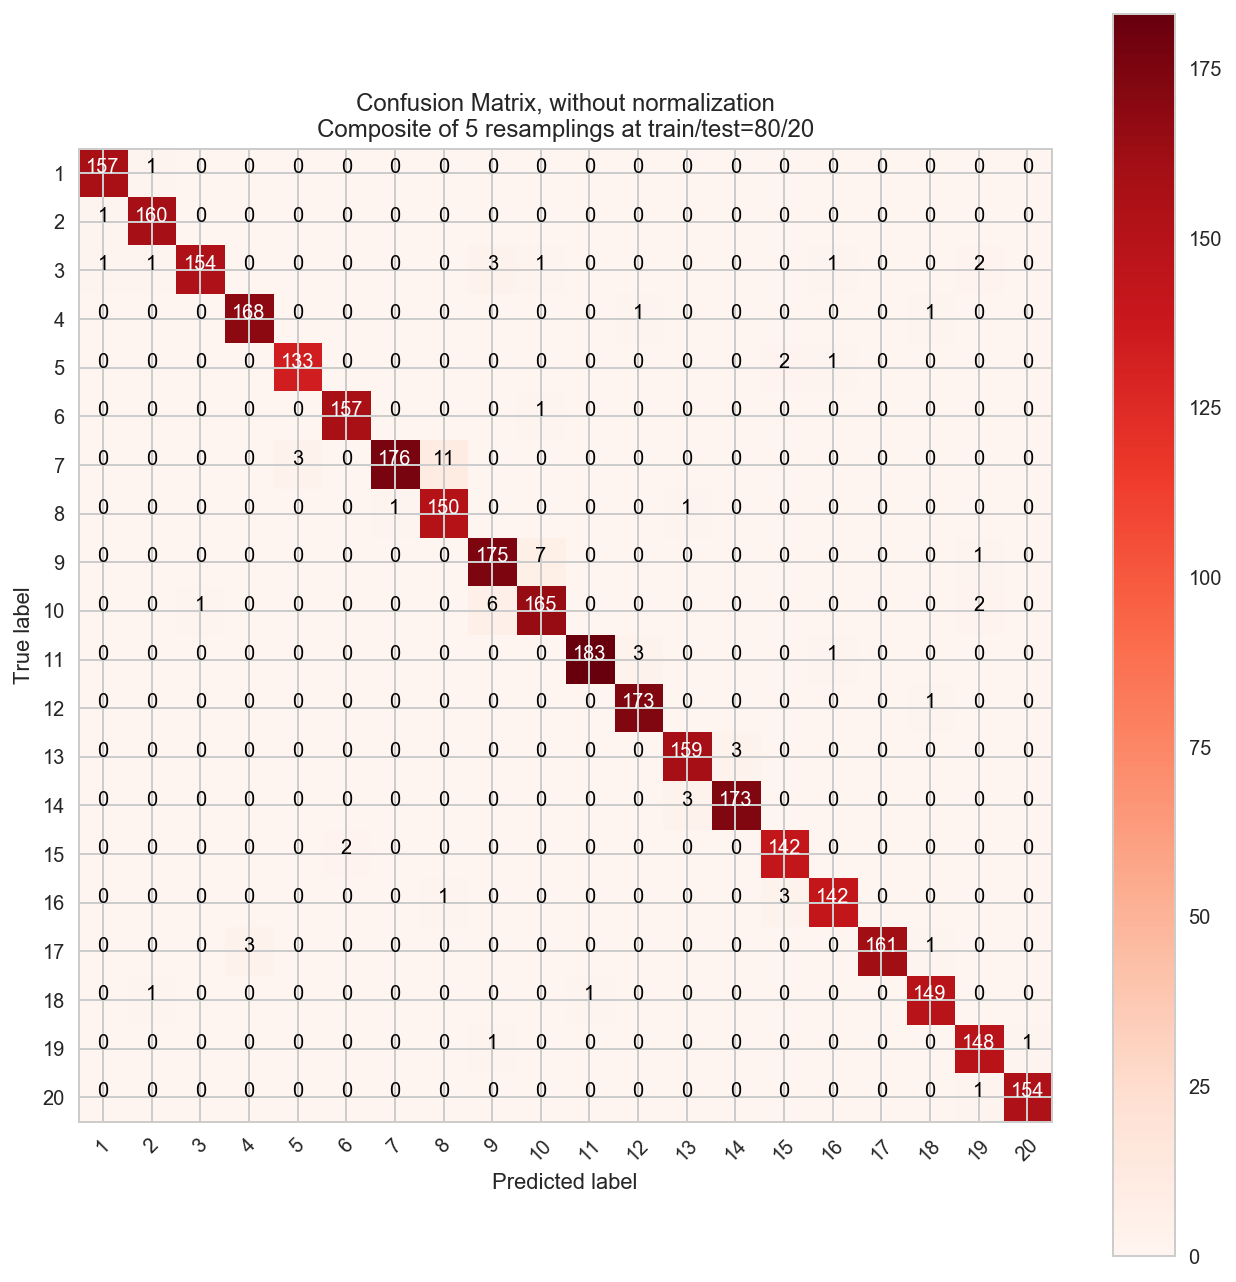

In [51]:
# Plot non-normalized confusion matrix
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(cnf_matrix, classes=range(1,20+1),
                      title='Confusion Matrix, without normalization\nComposite of '+str(r)+' resamplings at train/test=80/20')
fig.savefig("ConfusionMatrix_shuffle_ensable_by5.png",transparent=True)

In [52]:
# Plot normalized confusion matrix
fig, ax = plt.subplots(figsize=(9,9))
plot_confusion_matrix(cnf_matrix, classes=range(1,20+1), normalize=True,
                      title='Normalized confusion matrix\nComposite of '+str(r)+' resamplings at train/test=80/20'')
fig.savefig("ConfusionMatrix_shuffle_ensable_by5_norm.png",transparent=True)

SyntaxError: EOL while scanning string literal (<ipython-input-52-9b115efa3d72>, line 4)